In [1]:
import config
from bs4 import BeautifulSoup as BS
import requests
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
import time
import re
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

In [4]:
df_stats_total = pd.read_csv('df_stats_merged.csv', index_col='team')

In [59]:
df_stats_total4 = pd.read_csv('df_stats_merged4.csv', index_col='team')

In [100]:
df_stats_total6 = pd.read_csv('df_stats_merged6.csv', index_col='team')

In [133]:
df_stats_poss2 = pd.read_csv('df_stats_poss2.csv', index_col='Team')

In [138]:
df_stats_poss2.head()

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,5.911765,10.000000,2.088235,10.176471,571.000000,12.500000,12.794118,6.000000,9.323529,...,15.705882,64.029412,51.558824,1.411765,0.323529,0.176471,10.117647,0.088235,0.029412,0.622
Borussia Dortmund,13.470588,3.352941,6.882353,1.235294,11.441176,524.352941,12.941176,8.852941,4.352941,11.205882,...,13.970588,58.970588,52.441176,2.647059,0.088235,0.147059,18.470588,0.382353,0.029412,0.568
RasenBallsport Leipzig,18.117647,4.588235,8.470588,1.558824,11.764706,335.911765,9.264706,10.147059,4.470588,11.588235,...,22.500000,65.705882,61.941176,2.794118,0.500000,0.176471,19.647059,0.176471,0.088235,0.495
Bayer Leverkusen,18.882353,4.617647,8.970588,1.000000,11.764706,536.764706,9.970588,10.058824,5.735294,11.911765,...,16.882353,68.147059,55.441176,2.705882,0.441176,0.176471,18.882353,0.264706,0.000000,0.577
Borussia M.Gladbach,16.617647,4.117647,7.588235,1.352941,10.735294,436.617647,8.205882,8.411765,5.147059,8.941176,...,13.147059,56.970588,46.029412,3.382353,0.088235,0.088235,17.294118,0.117647,0.058824,0.523


In [135]:
df_stats_poss2 = df_stats_poss2.drop(df_stats_poss2.columns[0], axis=1)

In [22]:
df_leagues = pd.read_csv('df_stats_leagues.csv', index_col=0)

In [23]:
df_leagues.columns

Index(['league', 'team'], dtype='object')

In [25]:
df_leagues.shape

(98, 2)

In [26]:
df_leagues.head()

,league,team
0,Bundesliga,Bayern Munich
1,Bundesliga,Borussia Dortmund
4,Bundesliga,RasenBallsport Leipzig
2,Bundesliga,Bayer Leverkusen
8,Bundesliga,Borussia M.Gladbach


In [48]:
df_leagues['team']

0              Bayern Munich
1          Borussia Dortmund
4     RasenBallsport Leipzig
2           Bayer Leverkusen
8        Borussia M.Gladbach
               ...          
14         Parma Calcio 1913
15                     Genoa
10                    Empoli
18                 Frosinone
19                    Chievo
Name: team, Length: 98, dtype: object

In [60]:
df_stats_total4.head(10)

,INT,CR,ACR,CCOP,CCSP,BLK,TKL,FC,FS,P,...,SV,AKS,PKC,CL,PUNCH,ALB,ATB,LMT,TOFF,BCS
team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,336,777,201,340,71,61,464,312,346,19414,...,48,11,6,344,3,1292,31,1,88,52
Borussia Dortmund,385,458,114,234,42,79,497,292,389,17828,...,90,3,5,628,13,981,36,1,64,51
RasenBallsport Leipzig,420,616,156,288,53,70,653,465,400,11421,...,95,17,6,668,6,864,29,3,87,38
Bayer Leverkusen,364,642,157,305,34,99,598,370,400,18250,...,92,15,6,642,9,1197,23,0,66,44
Borussia M.Gladbach,310,565,140,258,46,102,500,332,365,14845,...,115,3,3,588,4,1067,19,2,70,30
Wolfsburg,430,681,176,226,48,95,540,358,445,12164,...,110,5,6,739,17,1449,16,4,67,37
Eintracht Frankfurt,380,686,155,210,55,103,612,432,353,9861,...,127,13,1,669,14,1094,20,1,84,45
Werder Bremen,407,676,164,274,39,109,552,437,350,13366,...,108,5,5,773,14,1086,14,2,40,30
Hoffenheim,400,666,179,364,56,104,574,471,355,13450,...,123,7,7,603,8,952,17,3,66,42


In [139]:
cos_sim = cosine_similarity(df_stats_poss2)

In [140]:
cos_sim

array([[1.        , 0.99954729, 0.99007659, ..., 0.99705861, 0.98655581,
        0.98992017],
       [0.99954729, 1.        , 0.99115561, ..., 0.99760916, 0.98756148,
        0.99096581],
       [0.99007659, 0.99115561, 1.        , ..., 0.99718181, 0.99900142,
        0.99908405],
       ...,
       [0.99705861, 0.99760916, 0.99718181, ..., 1.        , 0.99576251,
        0.99747257],
       [0.98655581, 0.98756148, 0.99900142, ..., 0.99576251, 1.        ,
        0.99934542],
       [0.98992017, 0.99096581, 0.99908405, ..., 0.99747257, 0.99934542,
        1.        ]])

In [28]:
epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()

In [141]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_poss2.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_stats_poss2.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(fr_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], fr_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], fr_teams[0], it_teams[0], ge_teams[0])
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(en_teams[0], fr_teams[0], it_teams[0], sp_teams[0])
    
    else:
        print('not applicable')
    
    return 


In [164]:
recommendations('Arsenal')

Lyon Sampdoria Real Betis Borussia M.Gladbach


In [145]:
for team in df_leagues['team']:
    print(team , recommendations(team), '++++++++')

Liverpool Paris Saint Germain Napoli Real Madrid
Bayern Munich None ++++++++
Chelsea Paris Saint Germain Napoli Real Betis
Borussia Dortmund None ++++++++
Everton Nantes Fiorentina Girona
RasenBallsport Leipzig None ++++++++
Tottenham Lyon Napoli Real Betis
Bayer Leverkusen None ++++++++
Tottenham Lyon AC Milan Real Madrid
Borussia M.Gladbach None ++++++++
Wolverhampton Wanderers Strasbourg Cagliari Villarreal
Wolfsburg None ++++++++
Brighton Guingamp Genoa Leganes
Eintracht Frankfurt None ++++++++
Manchester United Saint-Etienne Lazio Celta Vigo
Werder Bremen None ++++++++
Manchester United Saint-Etienne Lazio Celta Vigo
Hoffenheim None ++++++++
Wolverhampton Wanderers Montpellier Chievo Girona
Fortuna Duesseldorf None ++++++++
Leicester Bordeaux Cagliari Villarreal
Hertha Berlin None ++++++++
Huddersfield Montpellier Torino Girona
Mainz 05 None ++++++++
Wolverhampton Wanderers Dijon Chievo Villarreal
Freiburg None ++++++++
Crystal Palace Nantes Torino Rayo Vallecano
Schalke 04 None +

In [87]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_total4.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def opposites(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_stats_total4.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(fr_teams[-5:], it_teams[-5:], sp_teams[-5:], ge_teams[-5:])
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], it_teams[-1], sp_teams[-1], ge_teams[-1])
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], fr_teams[-1], sp_teams[-1], ge_teams[-1])
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], fr_teams[-1], it_teams[-1], ge_teams[-1])
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(en_teams[-1], fr_teams[-1], it_teams[-1], sp_teams[-1])
    
    else:
        print('not applicable')
    
    return 

In [91]:
opposites('Manchester City')

['Amiens', 'Reims', 'Guingamp', 'Caen', 'Nimes'] ['Torino', 'Bologna', 'Udinese', 'Genoa', 'Parma Calcio 1913'] ['Eibar', 'Leganes', 'SD Huesca', 'Alaves', 'Getafe'] ['Nuernberg', 'Augsburg', 'VfB Stuttgart', 'Schalke 04', 'Eintracht Frankfurt']


In [84]:
for team in df_leagues['team']:
    print(team , opposites(team), '++++++++')

Cardiff Nimes Parma Calcio 1913 Getafe
Bayern Munich None ++++++++
Cardiff Nimes Parma Calcio 1913 Getafe
Borussia Dortmund None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
RasenBallsport Leipzig None ++++++++
Cardiff Nimes Parma Calcio 1913 Getafe
Bayer Leverkusen None ++++++++
Cardiff Nimes Parma Calcio 1913 Getafe
Borussia M.Gladbach None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Wolfsburg None ++++++++
Manchester City Paris Saint Germain Napoli Barcelona
Eintracht Frankfurt None ++++++++
Cardiff Nimes Parma Calcio 1913 Getafe
Werder Bremen None ++++++++
Cardiff Nimes Parma Calcio 1913 Getafe
Hoffenheim None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Fortuna Duesseldorf None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Hertha Berlin None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Mainz 05 None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Freiburg None ++++++++
Cardiff Paris Saint Germain Napoli Getafe
Schalke 04 None ++++++++
Cardiff Paris

In [94]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_total4.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def l_recommendations(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    print(score_series)
    
    # populating the list with the titles of the best 10 matching movies
#     for i in all_indexes:
#         recommended_teams.append(list(df_stats_total4.index)[i])
    
#     if recommended_teams[0] in epl_array:
#         for i in recommended_teams:
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
            
#         print(fr_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in ligue_1_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in serie_a_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], fr_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in la_liga_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], fr_teams[0], it_teams[0], ge_teams[0])
        
#     elif recommended_teams[0] in bundesliga_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#         print(en_teams[0], fr_teams[0], it_teams[0], sp_teams[0])
    
#     else:
#         print('not applicable')
    
    return 

In [155]:
df_stats_poss2[df_stats_poss2['CR'] > 22]

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,5.911765,10.000000,2.088235,10.176471,571.000000,12.500000,12.794118,6.000000,9.323529,...,15.705882,64.029412,51.558824,1.411765,0.323529,0.176471,10.117647,0.088235,0.029412,0.622
Eibar,27.815789,7.000000,7.157895,2.000000,10.447368,310.052632,8.894737,9.289474,4.710526,10.210526,...,27.078947,67.789474,62.210526,2.184211,0.789474,0.105263,16.789474,0.315789,0.131579,0.520
Juventus,22.921053,5.657895,9.657895,1.657895,12.552632,455.868421,9.736842,9.631579,6.526316,8.526316,...,14.657895,57.000000,51.184211,2.210526,0.157895,0.105263,15.815789,0.315789,0.000000,0.549
Inter,28.710526,7.289474,10.631579,1.394737,13.078947,482.552632,7.526316,10.289474,6.394737,8.131579,...,14.184211,58.473684,50.184211,2.578947,0.184211,0.131579,15.184211,0.026316,0.000000,0.569
Roma,22.500000,6.342105,9.947368,1.763158,10.552632,372.657895,9.263158,10.710526,5.684211,9.236842,...,19.763158,58.473684,52.921053,3.105263,0.263158,0.184211,20.000000,0.157895,0.000000,0.510
SPAL 2013,22.736842,5.947368,7.026316,1.368421,14.684211,347.947368,7.210526,7.421053,4.736842,10.473684,...,15.710526,54.236842,52.000000,3.157895,0.131579,0.131579,21.052632,0.289474,0.052632,0.504


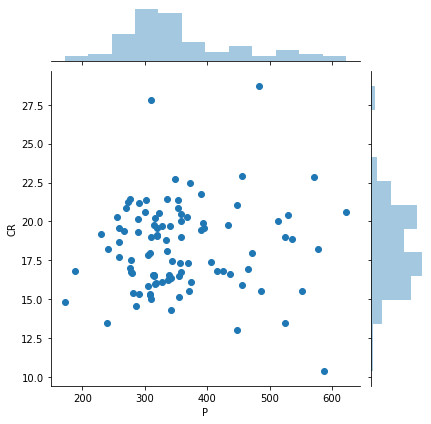

In [147]:
sns.jointplot(df_stats_poss2['P'], df_stats_poss2['CR'])

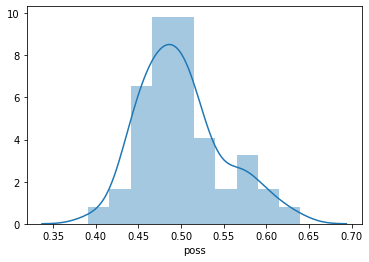

In [156]:
sns.distplot(df_stats_poss2['poss'], bins=10)

In [157]:
# Lyon Sampdoria Real Betis Borussia M.Gladbach
# Arsenal None ++++++++

In [163]:
df_stats_poss2[(df_stats_poss2.index == 'Arsenal') |
               (df_stats_poss2.index == 'Lyon') |
               (df_stats_poss2.index == 'Sampdoria') |
               (df_stats_poss2.index == 'Real Betis') |
               (df_stats_poss2.index == 'Borussia M.Gladbach')]

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Borussia M.Gladbach,16.617647,4.117647,7.588235,1.352941,10.735294,436.617647,8.205882,8.411765,5.147059,8.941176,...,13.147059,56.970588,46.029412,3.382353,0.088235,0.088235,17.294118,0.117647,0.058824,0.523
Arsenal,15.921053,3.315789,7.473684,0.710526,12.105263,456.078947,7.921053,8.315789,4.078947,10.789474,...,14.868421,60.421053,50.552632,3.500000,0.394737,0.184211,20.078947,0.473684,0.052632,0.561
Real Betis,15.526316,3.421053,6.736842,1.052632,14.605263,486.921053,11.473684,6.868421,4.815789,10.315789,...,12.657895,54.368421,54.289474,2.710526,0.447368,0.131579,16.868421,0.263158,0.157895,0.594
Lyon,17.947368,5.236842,10.052632,1.526316,12.605263,471.526316,12.026316,10.815789,6.894737,12.157895,...,16.684211,59.447368,57.368421,2.763158,0.289474,0.131579,16.184211,0.210526,0.078947,0.582
Sampdoria,16.789474,3.657895,7.078947,0.763158,13.736842,425.447368,7.289474,6.921053,5.894737,12.157895,...,13.000000,60.236842,50.105263,2.605263,0.526316,0.210526,19.894737,0.342105,0.026316,0.537
